# Project: Investigate a Dataset - [Police dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## The Dataset chosen for analysis: Police dataset 

>This data set contains information about 60,000 records of driving making violatios, the data contains information about driver_gender	driver_age	driver_race	violation search_conducted	search_type	stop_outcome  is_arrested	stop_duration	drugs_related_stop



### Question(s) for Analysis
>Q. 1) For Speeding , were Men or Women stopped more often ? 

>Q. 2) Does gender affect who gets searched during a stop ?

>Q. 3) Does race affect who gets arrested during a stop ?

>Q. 4) What is the mean stop_duration ?

>Q. 5) Compare the age distributions for each violation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
#Loading the data..
df = pd.read_csv('Police Data.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [4]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


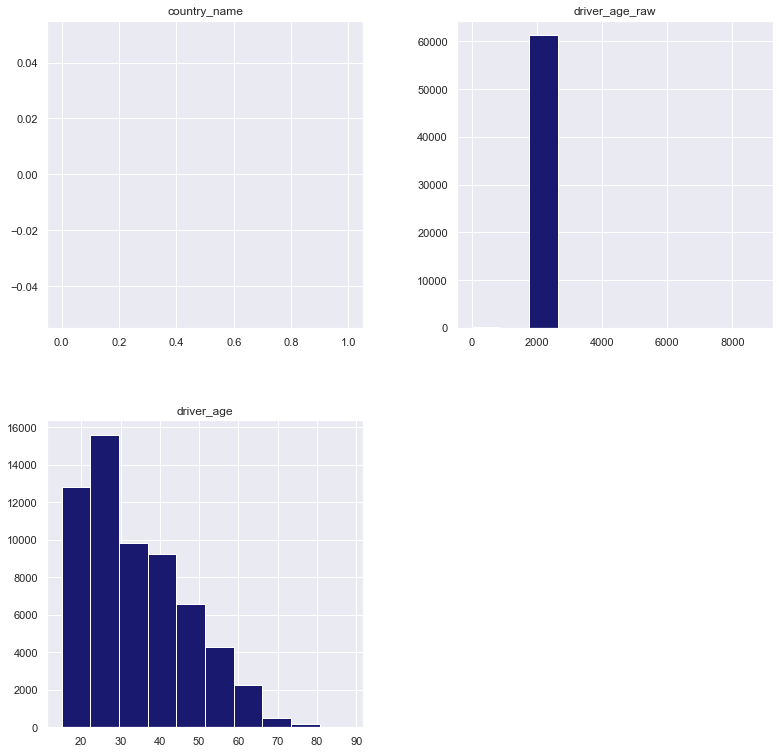

In [5]:
df.hist(figsize=(13,13),
        color = 'midnightblue');

### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>First, I removed columns that are not necessary for my analysis 'country_name', 'search_type' to improve database redability.

>I dropped the null values.

>I removed the duplicated rows.


In [6]:
df.drop(['country_name', 'search_type'], axis = 1, inplace =True)

In [7]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [8]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender         4061
driver_age_raw        4054
driver_age            4307
driver_race           4060
violation_raw         4060
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

183

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61039 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           61039 non-null  object 
 1   stop_time           61039 non-null  object 
 2   driver_gender       61039 non-null  object 
 3   driver_age_raw      61039 non-null  float64
 4   driver_age          61039 non-null  float64
 5   driver_race         61039 non-null  object 
 6   violation_raw       61039 non-null  object 
 7   violation           61039 non-null  object 
 8   search_conducted    61039 non-null  bool   
 9   stop_outcome        61039 non-null  object 
 10  is_arrested         61039 non-null  object 
 11  stop_duration       61039 non-null  object 
 12  drugs_related_stop  61039 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 5.7+ MB


# Q1: For speeding were women or men stopped more often

In [13]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [14]:
df.groupby('driver_gender')['violation'].value_counts()

driver_gender  violation          
F              Speeding               11636
               Moving violation        2133
               Equipment               1389
               Registration/plates      626
               Other                    450
M              Speeding               25382
               Moving violation        9711
               Equipment               5100
               Other                   3013
               Registration/plates     1596
               Seat belt                  3
Name: violation, dtype: int64

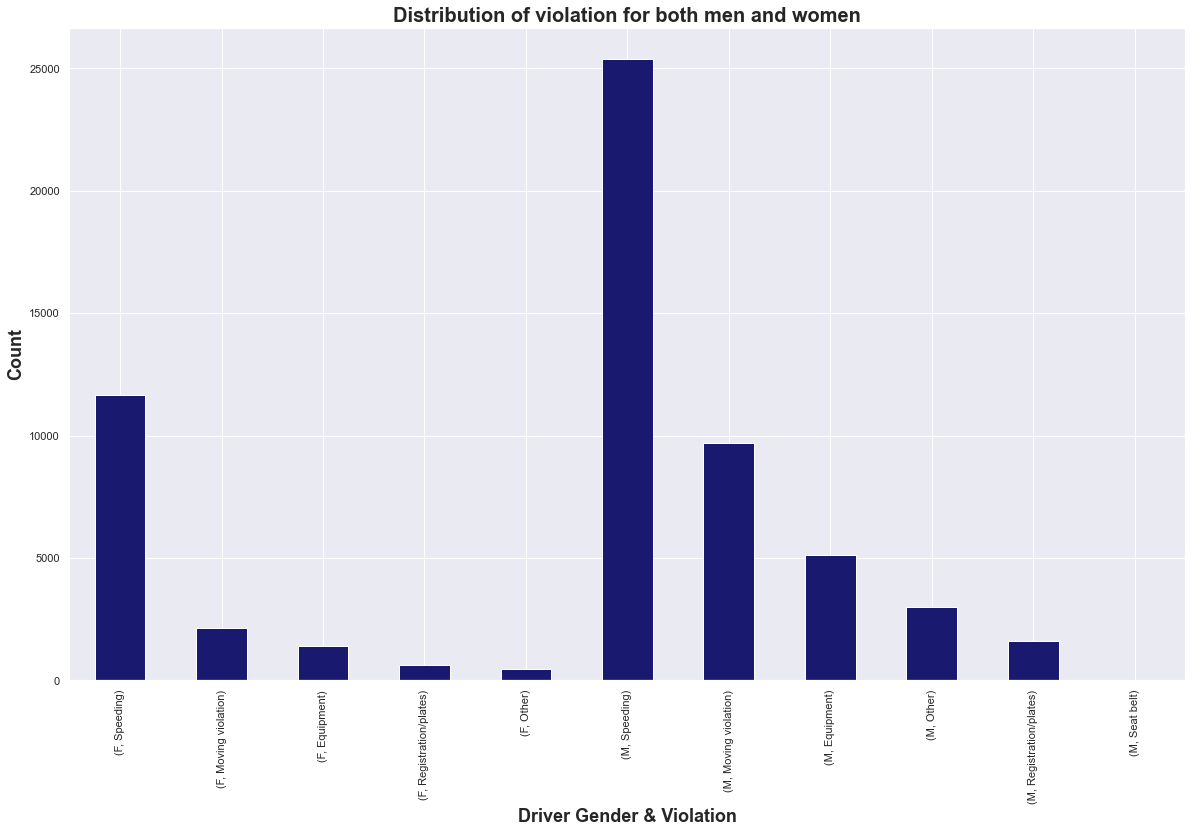

In [15]:
plt.figure(figsize=(20,12))
df.groupby('driver_gender')['violation'].value_counts().plot(kind = 'bar',
                                                             color = 'midnightblue')
plt.title('Distribution of violation for both men and women', fontsize = 20, weight = 'bold')
plt.xlabel('Driver Gender & Violation', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.show();

>From the dataset, we can conclude that the number of men stopped for speeding is higher than the number of women.

# Q2: Does gender affect who gets searched during a stop?

In [16]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [17]:
searched_df = df.query('search_conducted == True')
searched_df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
24,8/28/2005,1:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,Arrest Driver,True,16-30 Min,False
40,10/1/2005,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Arrest Driver,True,16-30 Min,True
41,10/1/2005,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Citation,False,30+ Min,True
80,10/2/2005,9:30,M,1975.0,30.0,White,Speeding,Speeding,True,Arrest Driver,True,30+ Min,False
106,10/3/2005,14:00,M,1978.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Citation,False,16-30 Min,False


In [18]:
searched_df.groupby('driver_gender')['search_conducted'].count()

driver_gender
F     365
M    2103
Name: search_conducted, dtype: int64

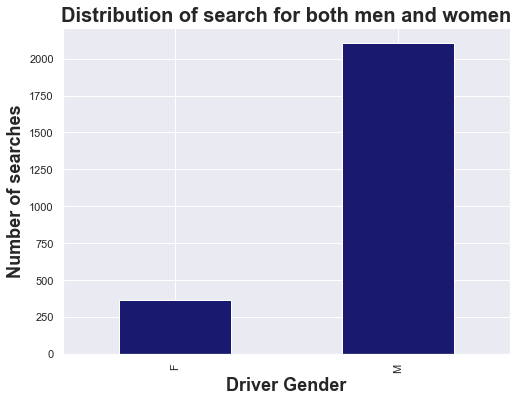

In [19]:
plt.figure(figsize=(8,6))
searched_df.groupby('driver_gender')['search_conducted'].count().plot(kind = 'bar',
                                                                      color = 'midnightblue')
plt.title('Distribution of search for both men and women', fontsize = 20, weight = 'bold')
plt.xlabel('Driver Gender', fontsize = 18, weight = 'bold')
plt.ylabel('Number of searches', fontsize = 18, weight = 'bold')
plt.show();

>The number of men searched is way higher than the number of women.

# For a better insight, we should calculate the propotion of men and women got searced


In [20]:
df.groupby('driver_gender')['search_conducted'].count()

driver_gender
F    16234
M    44805
Name: search_conducted, dtype: int64

In [21]:
tot_men = 45164
tot_female = 16310

In [22]:
#from the searched dataframe we made
searched_df.groupby('driver_gender')['search_conducted'].count()

driver_gender
F     365
M    2103
Name: search_conducted, dtype: int64

In [23]:
prop_men_searched = 2103/45164
prop_women_searched = 365/ 16310

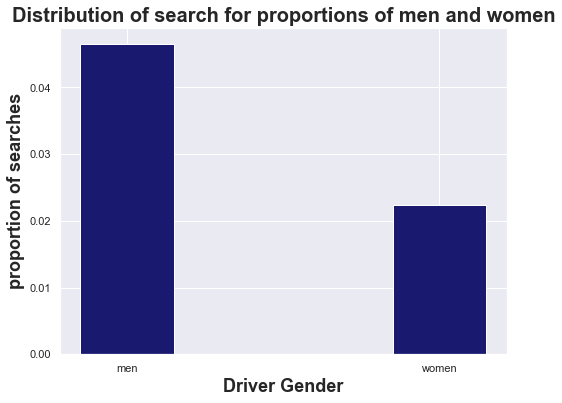

In [24]:
plt.figure(figsize=(8,6))
plt.bar(['men', 'women'],
        [prop_men_searched, prop_women_searched],
         width = 0.3,
         color = 'midnightblue')
                                                                      
plt.title('Distribution of search for proportions of men and women', fontsize = 20, weight = 'bold')
plt.xlabel('Driver Gender', fontsize = 18, weight = 'bold')
plt.ylabel('proportion of searches', fontsize = 18, weight = 'bold')
plt.show();

>After calculating the proportions for both genders, still the proportion of men getting searched is almost double the proportion of women searched.

# Q3: Does race affect who gets arrested during a stop?

In [25]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [26]:
df['is_arrested'].value_counts()

False    58808
True      2231
Name: is_arrested, dtype: int64

In [27]:
df.groupby('driver_race')['is_arrested'].value_counts()

driver_race  is_arrested
Asian        False           1600
             True              31
Black        False           7661
             True             538
Hispanic     False           5208
             True             357
Other        False            207
             True               2
White        False          44132
             True            1303
Name: is_arrested, dtype: int64

## Calculating proportions for every race

In [28]:
prop_white = 1303/(1303+44132)
prop_other = 2/(2+207)
prop_hispanic = 357/(357+5208)
prop_black = 538/(5208+7661)
prop_asian = 31/(31+1600)

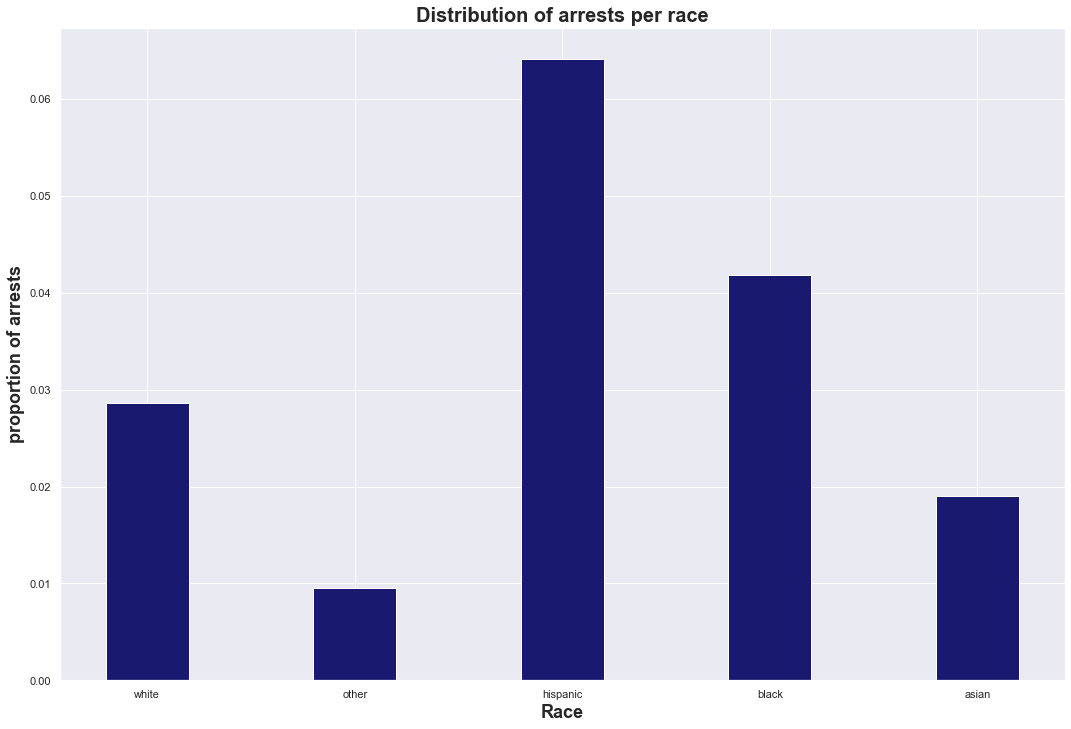

In [29]:
plt.figure(figsize=(18,12))
plt.bar(['white', 'other', 'hispanic', 'black', 'asian'],
        [prop_white,prop_other,prop_hispanic,prop_black,prop_asian],
        width = 0.4,
        color = 'midnightblue')
plt.title('Distribution of arrests per race', fontsize = 20, weight = 'bold')
plt.xlabel('Race', fontsize = 18, weight = 'bold')
plt.ylabel('proportion of arrests', fontsize = 18, weight = 'bold')
plt.show();

> Being a hispanic or black means you have a higher chance of getting arrested compared to other races.

# Q4: What is the mean stop_duration?

In [30]:
df.head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
5,3/23/2005,9:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
6,4/1/2005,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
7,6/6/2005,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
8,7/13/2005,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
9,7/13/2005,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61039 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           61039 non-null  object 
 1   stop_time           61039 non-null  object 
 2   driver_gender       61039 non-null  object 
 3   driver_age_raw      61039 non-null  float64
 4   driver_age          61039 non-null  float64
 5   driver_race         61039 non-null  object 
 6   violation_raw       61039 non-null  object 
 7   violation           61039 non-null  object 
 8   search_conducted    61039 non-null  bool   
 9   stop_outcome        61039 non-null  object 
 10  is_arrested         61039 non-null  object 
 11  stop_duration       61039 non-null  object 
 12  drugs_related_stop  61039 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 5.7+ MB


In [32]:
df['stop_duration'].value_counts()

0-15 Min     47087
16-30 Min    11332
30+ Min       2619
2                1
Name: stop_duration, dtype: int64

In [33]:
df['stop_duration'] = df['stop_duration'].map({'0-15 Min' : 7.5, '16-30 Min' : 24, '30+ Min' : 45  })

In [34]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61039 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           61039 non-null  object 
 1   stop_time           61039 non-null  object 
 2   driver_gender       61039 non-null  object 
 3   driver_age_raw      61039 non-null  float64
 4   driver_age          61039 non-null  float64
 5   driver_race         61039 non-null  object 
 6   violation_raw       61039 non-null  object 
 7   violation           61039 non-null  object 
 8   search_conducted    61039 non-null  bool   
 9   stop_outcome        61039 non-null  object 
 10  is_arrested         61039 non-null  object 
 11  stop_duration       61038 non-null  float64
 12  drugs_related_stop  61039 non-null  bool   
dtypes: bool(2), float64(3), object(8)
memory usage: 5.7+ MB


In [36]:
df['stop_duration'].mean()

12.172343458173597

>We calculated the mean stop duration and it's equal to 12.17 minutes.

# Q5: Compare the age distribution for each violation

In [37]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [38]:
df['violation'].value_counts()

Speeding               37018
Moving violation       11844
Equipment               6489
Other                   3463
Registration/plates     2222
Seat belt                  3
Name: violation, dtype: int64

# Analysis for the four highest violations:
>Speeding

>Moving violation

>Equipment 

>Registration/plates

# Speeding

In [39]:
speeding_df = df.query('violation == "Speeding"')

In [40]:
speeding_df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [41]:
speeding_df.groupby('driver_age')['violation'].value_counts()

driver_age  violation
15.0        Speeding        1
16.0        Speeding       18
17.0        Speeding      337
18.0        Speeding      976
19.0        Speeding     1651
                         ... 
82.0        Speeding        7
83.0        Speeding        1
84.0        Speeding        3
86.0        Speeding        3
88.0        Speeding        2
Name: violation, Length: 72, dtype: int64

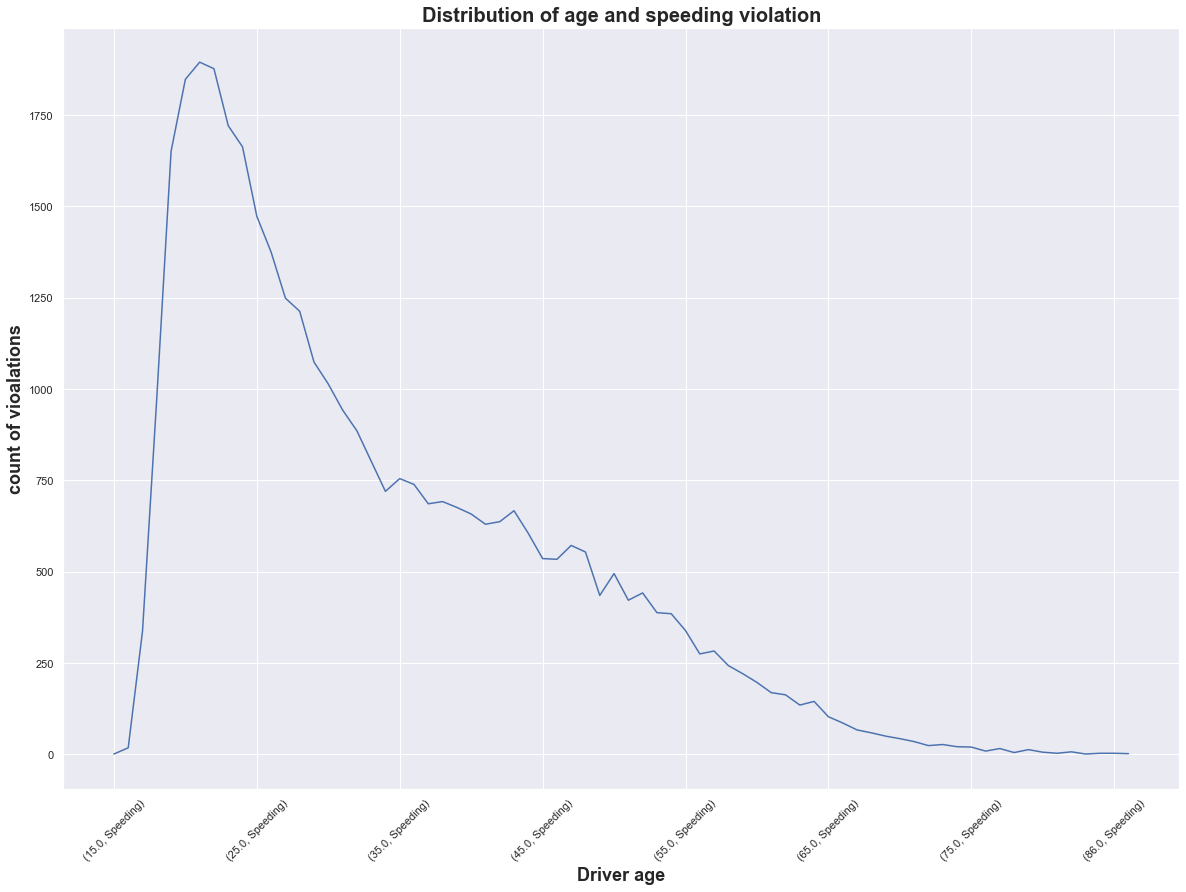

In [42]:
plt.figure(figsize=(20,14))
speeding_df.groupby('driver_age')['violation'].value_counts().plot()
plt.xticks(rotation = 45)
plt.title('Distribution of age and speeding violation', fontsize = 20, weight = 'bold')
plt.xlabel('Driver age', fontsize = 18, weight = 'bold')
plt.ylabel('count of vioalations', fontsize = 18, weight = 'bold')
plt.show();

>Most of the violations done from people between the age of 18 to 28

>After the age of 50 the number of violations fastly deteriorate.

# Moving Violations

In [43]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [44]:
moving_violations_df = df.query('violation == "Moving violation"')

In [45]:
moving_violations_df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
21,8/7/2005,16:50,M,1953.0,52.0,White,Other Traffic Violation,Moving violation,False,Citation,False,7.5,False
22,8/8/2005,2:09,M,1955.0,50.0,Black,Other Traffic Violation,Moving violation,False,Arrest Driver,True,45.0,False
24,8/28/2005,1:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,Arrest Driver,True,24.0,False


In [46]:
moving_violations_df.groupby('driver_age')['violation'].value_counts()

driver_age  violation       
15.0        Moving violation      4
16.0        Moving violation      6
17.0        Moving violation     63
18.0        Moving violation    168
19.0        Moving violation    327
                               ... 
81.0        Moving violation      2
82.0        Moving violation      1
83.0        Moving violation      1
85.0        Moving violation      1
86.0        Moving violation      2
Name: violation, Length: 71, dtype: int64

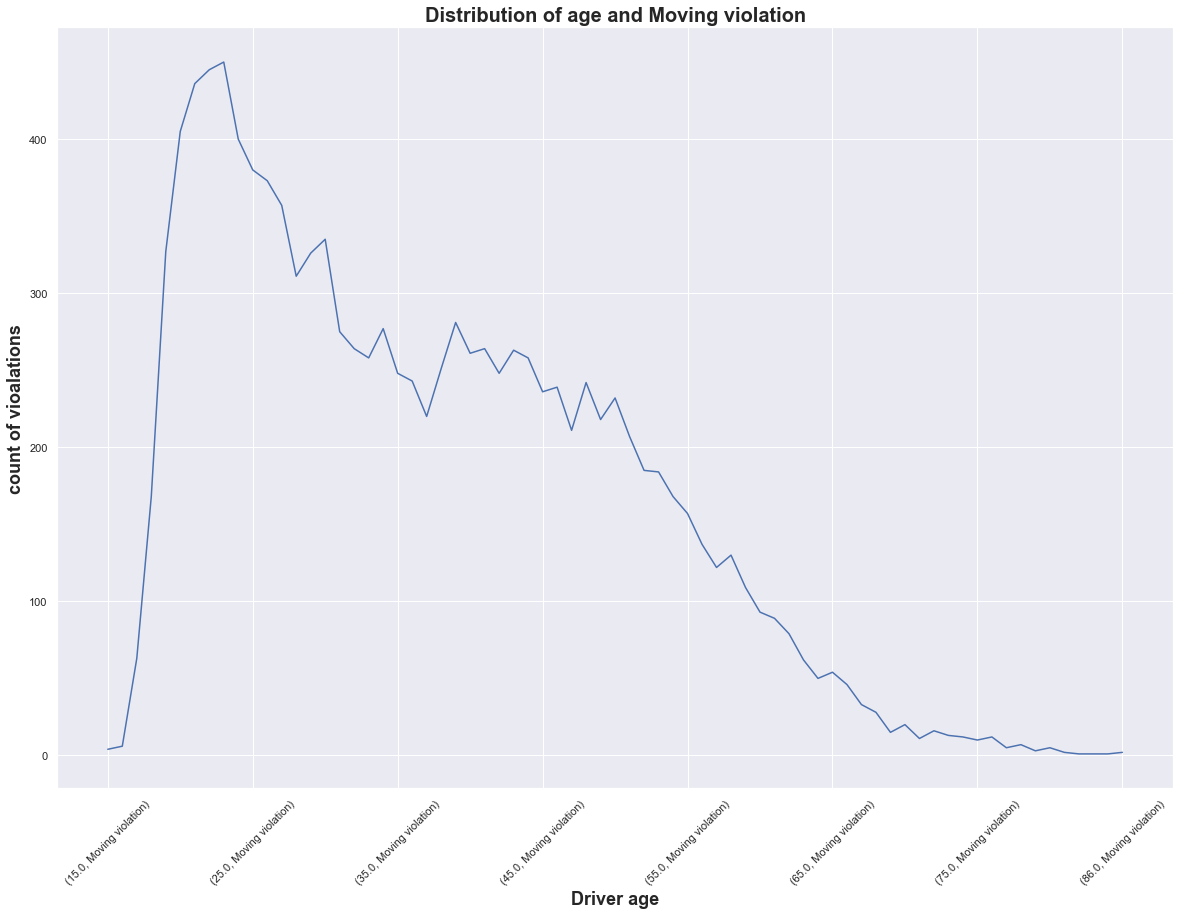

In [47]:
plt.figure(figsize=(20,14))
moving_violations_df.groupby('driver_age')['violation'].value_counts().plot()
plt.xticks(rotation = 45)
plt.title('Distribution of age and Moving violation', fontsize = 20, weight = 'bold')
plt.xlabel('Driver age', fontsize = 18, weight = 'bold')
plt.ylabel('count of vioalations', fontsize = 18, weight = 'bold')
plt.show();

>The moving violation has a higher range of ages compared to others, most of the violations from the age of 18 to 50

>After the age of 60 the number of violations fastly deteriorate.

# Equipment 

In [48]:
equipment_df = df.query('violation == "Equipment"')

In [49]:
equipment_df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
5,3/23/2005,9:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,7.5,False
17,7/19/2005,23:30,M,1979.0,26.0,White,Equipment/Inspection Violation,Equipment,False,Citation,False,7.5,False


In [50]:
equipment_df.groupby('driver_age')['violation'].value_counts()

driver_age  violation
16.0        Equipment      4
17.0        Equipment     32
18.0        Equipment    130
19.0        Equipment    280
20.0        Equipment    346
                        ... 
76.0        Equipment      1
77.0        Equipment      2
79.0        Equipment      1
80.0        Equipment      1
81.0        Equipment      1
Name: violation, Length: 65, dtype: int64

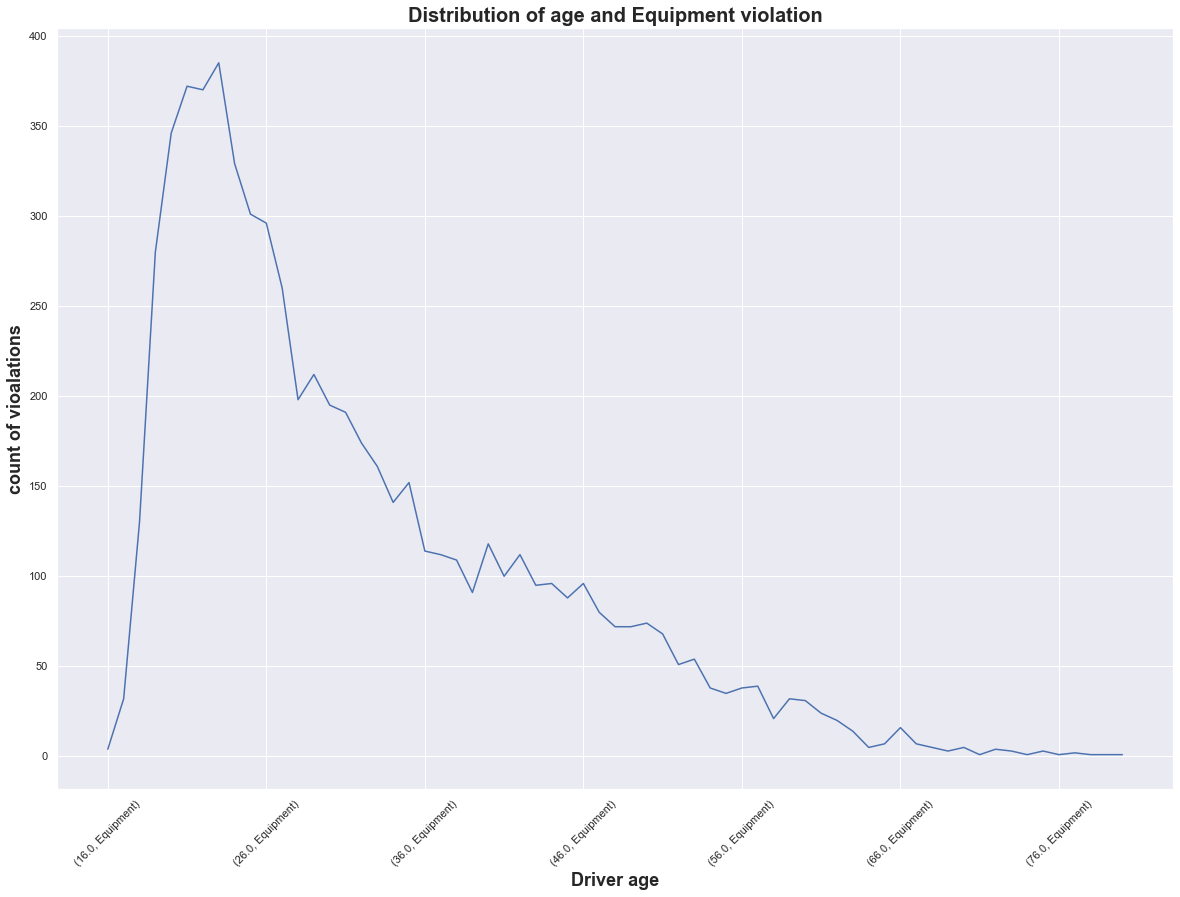

In [51]:
plt.figure(figsize=(20,14))
equipment_df.groupby('driver_age')['violation'].value_counts().plot()
plt.xticks(rotation = 45)
plt.title('Distribution of age and Equipment violation', fontsize = 20, weight = 'bold')
plt.xlabel('Driver age', fontsize = 18, weight = 'bold')
plt.ylabel('count of vioalations', fontsize = 18, weight = 'bold')
plt.show();

>The Equipment violation has most of its  violations from the age of 18 to 28

>After the age of 40 the number of violations fastly deteriorate.

# Registration/plates

In [52]:
plates_df = df.query('violation == "Registration/plates"')

In [53]:
plates_df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
113,10/3/2005,23:20,M,1954.0,51.0,White,Registration Violation,Registration/plates,False,Citation,False,7.5,False
129,10/4/2005,14:30,M,1977.0,28.0,White,Registration Violation,Registration/plates,False,Citation,False,24.0,False
186,10/6/2005,13:50,M,1955.0,50.0,White,Registration Violation,Registration/plates,False,Citation,False,24.0,False


In [54]:
plates_df.groupby('driver_age')['violation'].value_counts()

driver_age  violation          
16.0        Registration/plates      5
17.0        Registration/plates      8
18.0        Registration/plates     36
19.0        Registration/plates     69
20.0        Registration/plates    106
21.0        Registration/plates     96
22.0        Registration/plates    128
23.0        Registration/plates     98
24.0        Registration/plates    108
25.0        Registration/plates     98
26.0        Registration/plates    114
27.0        Registration/plates     93
28.0        Registration/plates     77
29.0        Registration/plates     72
30.0        Registration/plates     58
31.0        Registration/plates     51
32.0        Registration/plates     69
33.0        Registration/plates     49
34.0        Registration/plates     51
35.0        Registration/plates     60
36.0        Registration/plates     43
37.0        Registration/plates     54
38.0        Registration/plates     40
39.0        Registration/plates     46
40.0        Registration/plates 

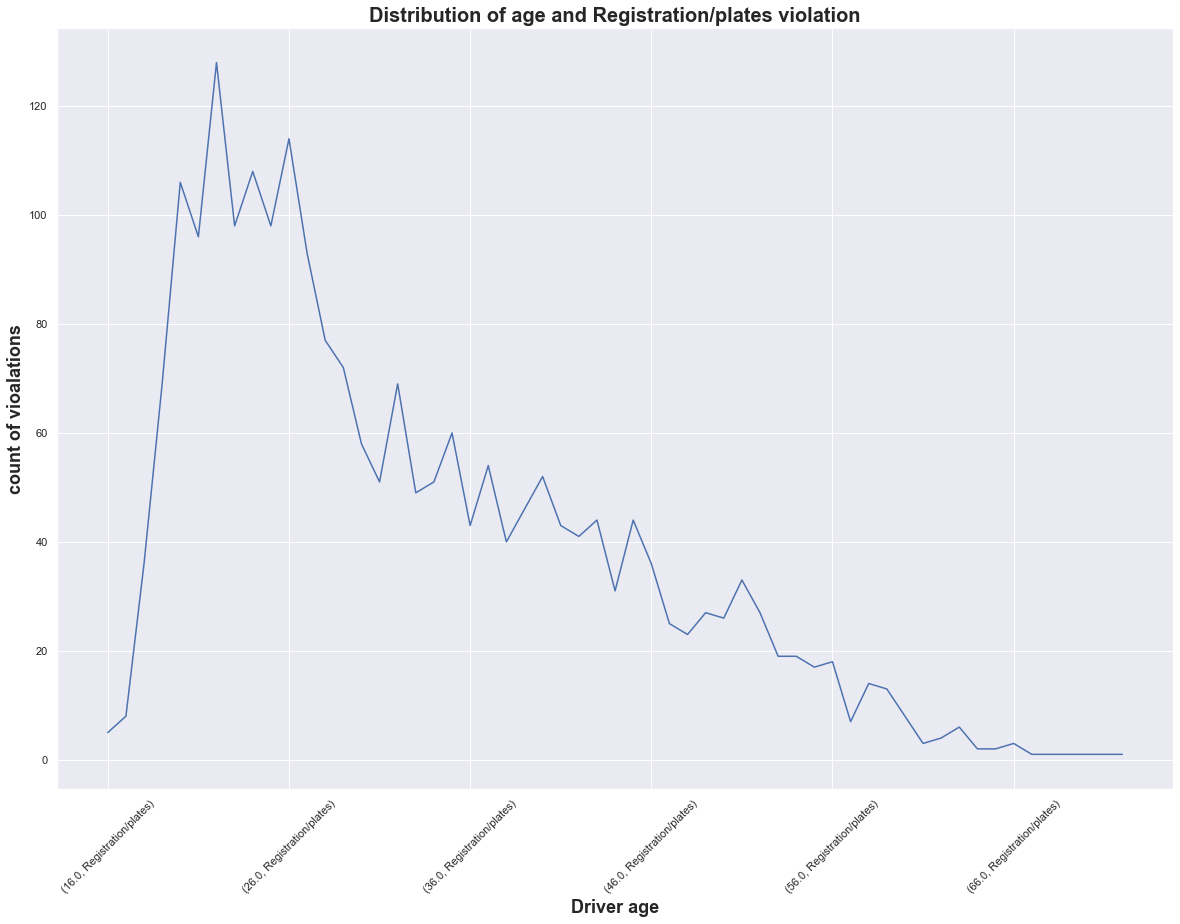

In [55]:
plt.figure(figsize=(20,14))
plates_df.groupby('driver_age')['violation'].value_counts().plot()
plt.xticks(rotation = 45)
plt.title('Distribution of age and Registration/plates violation', fontsize = 20, weight = 'bold')
plt.xlabel('Driver age', fontsize = 18, weight = 'bold')
plt.ylabel('count of vioalations', fontsize = 18, weight = 'bold')
plt.show();

>The Registration/plates has most of its  violations from the age of 18 to 36

>After the age of 50 the number of violations fastly deteriorate.

# An overview of the type of violation and driver age

In [56]:
df.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6489.0,31.682540,11.383680,16.0,23.0,28.0,39.0,81.0
Moving violation,11844.0,36.742232,13.258955,15.0,25.0,35.0,47.0,86.0
Other,3463.0,40.394456,12.749930,16.0,30.0,41.0,50.0,86.0
Registration/plates,2222.0,32.652115,11.151732,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37018.0,33.269328,12.618928,15.0,23.0,30.0,42.0,88.0


# Conclusions:

>We concluded that the number of men stopped for speeding is higher than the number of women.

>The number of men searched is way higher than the number of women.

>After calculating the proportions for both genders, still the proportion of men getting searched is almost double the proportion of women searched.

>Being a hispanic or black means you have a higher chance of getting arrested compared to other races.

>Calculated the mean stop duration and it's equal to 12.17 minutes.

>Most of the speed violations done from people between the age of 18 to 28, after the age of 50 the number of violations fastly deteriorate.

>The moving violation has a higher range of ages compared to others, most of the violations from the age of 18 to 50, after the age of 60 the number of violations fastly deteriorate.

>The Equipment violation has most of its  violations from the age of 18 to 28, after the age of 40 the number of violations fastly deteriorate.

>The Registration/plates has most of its  violations from the age of 18 to 36, after the age of 50 the number of violations fastly deteriorate.